In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# creating engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflecting an existing database into a new model
Base = automap_base()

# reflecting the tables
Base.prepare(engine, reflect=True)

In [6]:
# Viewing all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Saving references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Creating session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Finding the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


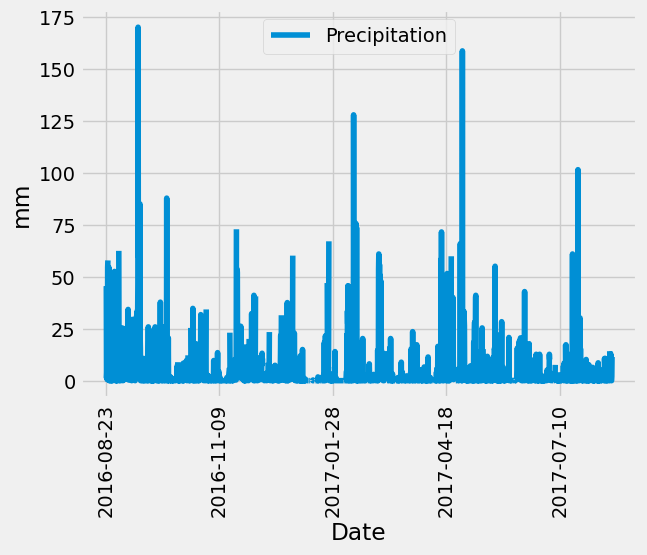

In [10]:
# Designing a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date_clc = dt.datetime.strptime(recent_date[0],'%Y-%m-%d').date() 

#date_clc = dt.datetime(2017, 8, 23)  - Note: We could use this instead of above code as per hint in the assignment to yield same result

# Calculating the date one year from the last date in data set.
 
year_ago =  date_clc - dt.timedelta(days=365)

# Performing a query to retrieve the data and precipitation scores

precp_year = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()

# Saving the query results as a Pandas DataFrame. Explicitly setting the column names

df = pd.DataFrame(precp_year, columns=['Date', 'Precipitation'])

# Plotting the Results in a Matplotlib bar chart
# Sorting the dataframe by date
df = df.sort_values('Date') # We can also dropna from the dataframe before plotting but the result is same.

# Using Pandas Plotting with Matplotlib to plot the data

df.plot(x = "Date", y= "Precipitation", rot = 90, ylabel = "mm" )

plt.show()


In [11]:
# Using Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [12]:
# Designing a query to calculate the total number of stations in the dataset
total_stns = session.query(measurement.station).distinct().count()
total_stns

9

In [13]:
# Designing a query to find the most active stations (i.e. which stations have the most rows?)
# Listing the stations and their counts in descending order.
x = func.count(measurement.date)
most_act = (session.query(measurement.station, x).group_by(measurement.station)
            .order_by(x.desc()).all())

most_act

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculatingthe lowest, highest, and average temperature.
sel =[func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)]
most_act_temp = session.query(*sel).filter(measurement.station == most_act[0][0])
for row in most_act_temp:
    print(row)

(12.2, 29.4, 22.03582251082252)


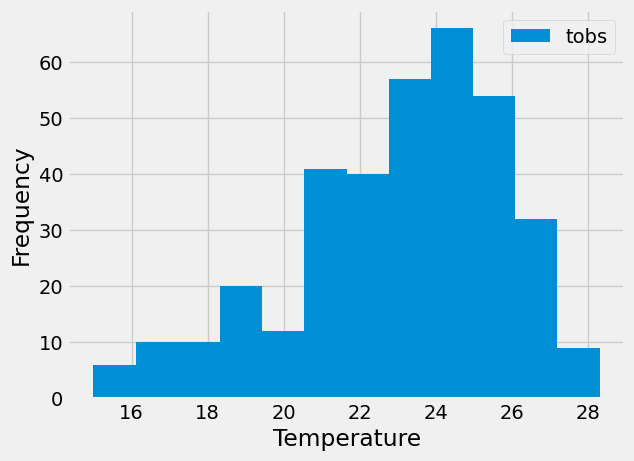

In [15]:
# Using the most active station id
# Querying the last 12 months of temperature observation data for this station and plotting the results as a histogram

# Finding last 12 month date for most active station
recent_date_act = session.query(measurement.date).filter(measurement.station == most_act[0][0]).\
order_by(measurement.date.desc()).first()
date_clc_act = dt.datetime.strptime(recent_date_act[0],'%Y-%m-%d').date()
year_ago_act =  date_clc_act - dt.timedelta(days=365)

# Note:we could use last 12 months date from most recent date as calculated for previous line graph however
# I have used 12 months of temperature data for the most active station based on the most reccent date available for that station here

# Retrieving filtered data for most active station id
temp_year = session.query(measurement.tobs, measurement.date).filter(measurement.station == most_act[0][0]).\
filter(measurement.date >= year_ago_act).all()

# Adding filtered data to dataframe
df = pd.DataFrame(temp_year, columns=['tobs','Date'])
df= df.sort_values('tobs')

#Plotting histogram
plt.hist(df['tobs'], bins=12)
plt.title("")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(['tobs'])

plt.show()


# Close Session

In [16]:
# Close Session
session.close()